In [1]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:22<00:00, 20.8MB/s]
100% 2.70G/2.70G [02:22<00:00, 20.3MB/s]


In [5]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

In [11]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [9]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/content/test"

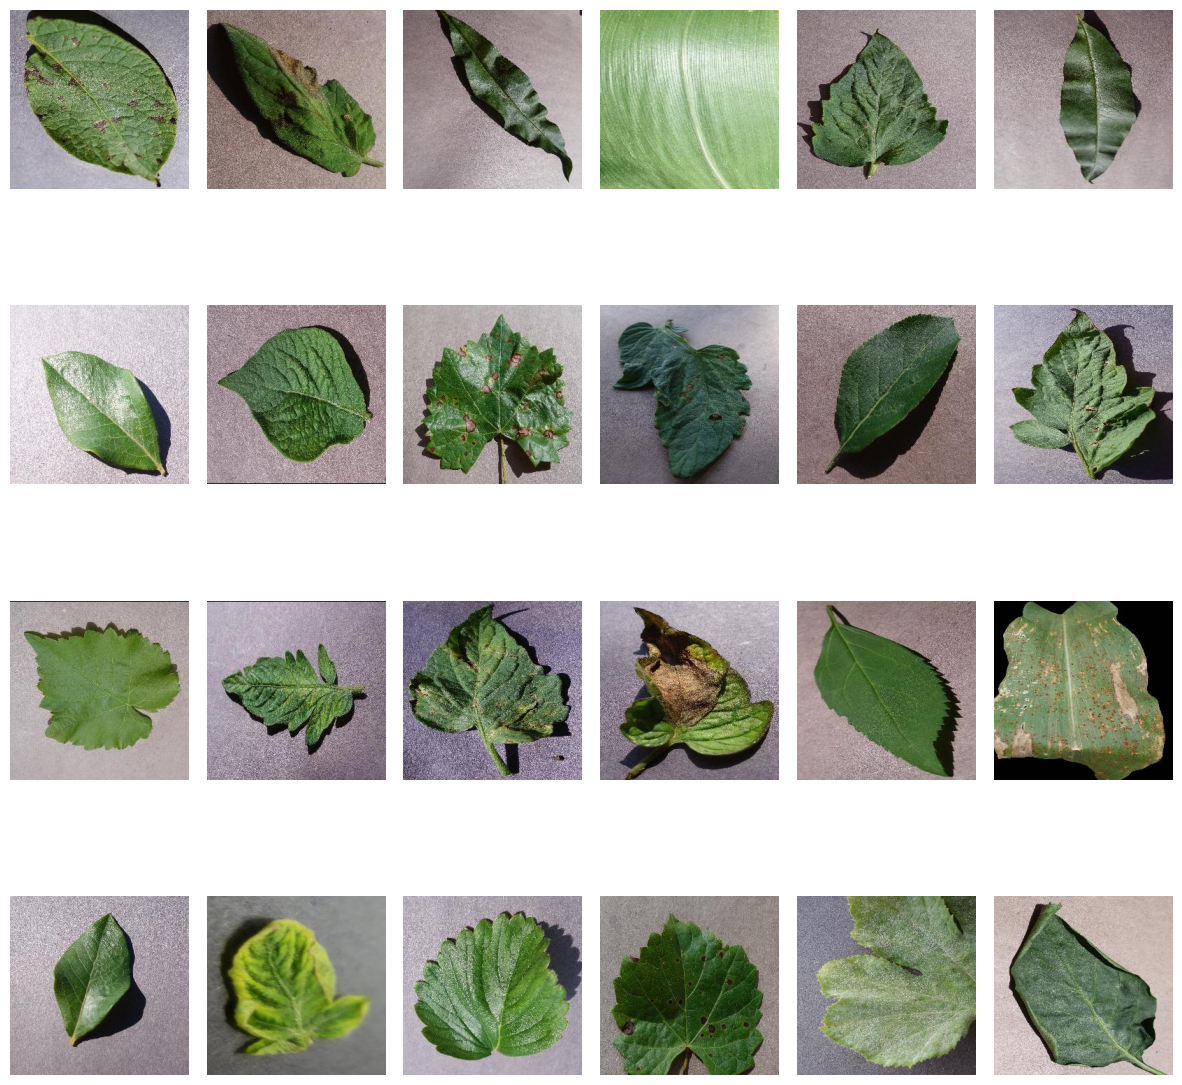

In [12]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [15]:
class_names = os.listdir(image_path)
print(class_names)

['Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Apple___Apple_scab', 'Peach___healthy', 'Squash___Powdery_mildew', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Potato___healthy', 'Blueberry___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Soybean___healthy', 'Pepper,_bell___Bacterial_spot', 'Tomato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Apple___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Tomato___healthy', 'Raspberry___healthy', 'Tomato___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Apple___Black_rot', 'Tomato___Leaf_Mold', 'Potato___Late_blight', 'Pep

In [16]:
print("Number of classes : {}".format(len(class_names)))


Number of classes : 38


In [17]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

In [ ]:
images_each_class

Class Name  Number of Images
0                                     Peach___healthy              1728
1                                 Raspberry___healthy              1781
2                                    Potato___healthy              1824
3                                   Grape___Black_rot              1888
4                                Strawberry___healthy              1824
5                            Apple___Cedar_apple_rust              1760
6                       Pepper,_bell___Bacterial_spot              1913
7                        Tomato___Tomato_mosaic_virus              1790
8                 Corn_(maize)___Northern_Leaf_Blight              1908
9       Tomato___Spider_mites Two-spotted_spider_mite              1741
10                                  Apple___Black_rot              1987
11                                 Apple___Apple_scab              2016
12                            Tomato___Bacterial_spot              1702
13                  Cherry_(including_sour)___healthy              1826
14                              Tomato___Early_blight              1920
15           Orange___Haunglongbing_(Citrus_greening)              2010
16                                 Tomato___Leaf_Mold              1882
17                        Tomato___Septoria_leaf_spot              1745
18                             Pepper,_bell___healthy              1988
19                        Corn_(maize)___Common_rust_              1907
20                            Squash___Powdery_mildew              1736
21             Tomato___Tomato_Yellow_Leaf_Curl_Virus              1961
22                                    Apple___healthy              2008
23                                  Soybean___healthy              2022
24                                   Tomato___healthy              1926
25                             Peach___Bacterial_spot              1838
26                               Tomato___Late_blight              1851
27                              Potato___Early_blight              1939
28                               Potato___Late_blight              1939
29  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...              1642
30                               Tomato___Target_Spot              1827
31         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)              1722
32                                    Grape___healthy              1692
33                                Blueberry___healthy              1816
34                           Strawberry___Leaf_scorch              1774
35           Cherry_(including_sour)___Powdery_mildew              1683
36                             Corn_(maize)___healthy              1859
37                       Grape___Esca_(Black_Measles)              1920

<ipython-input-18-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


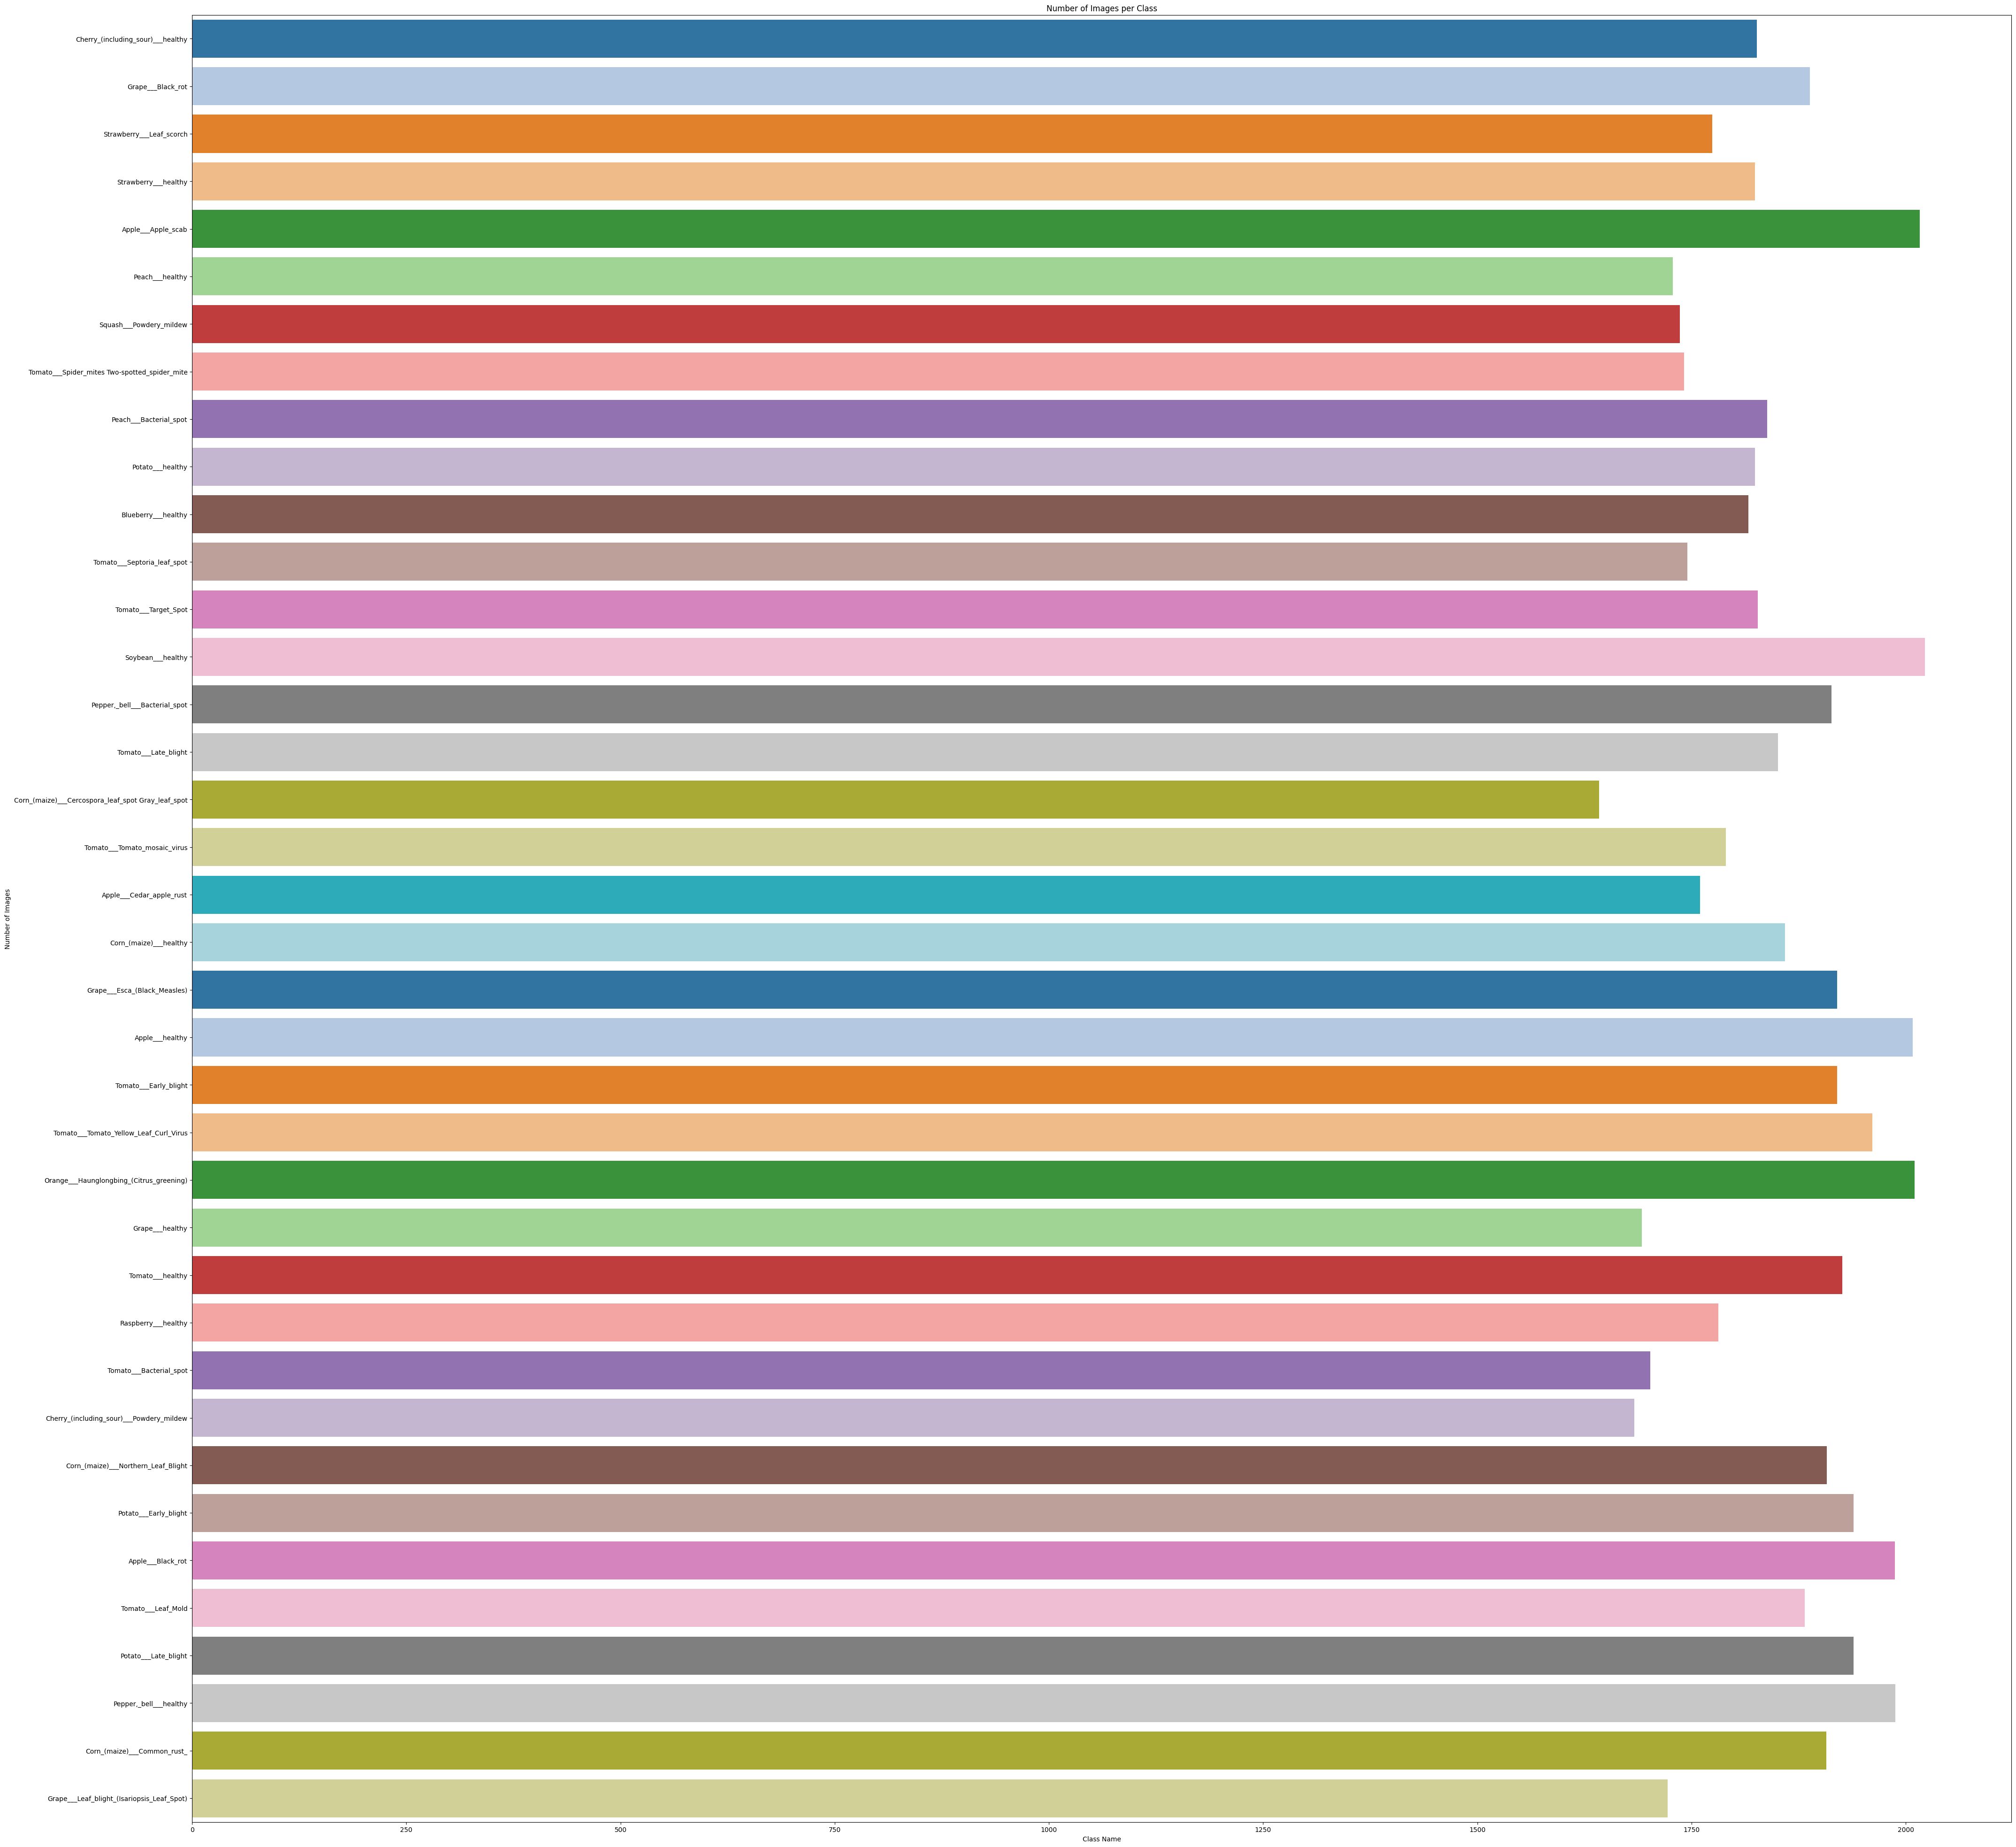

In [18]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [19]:
cnn = tf.keras.models.Sequential()

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [25]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [26]:

cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [29]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [31]:
cnn.compile(optimizer=Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 172s 69ms/step - accuracy: 0.3955 - loss: 2.1307 - val_accuracy: 0.8288 - val_loss: 0.5573
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 180s 66ms/step - accuracy: 0.8447 - loss: 0.4946 - val_accuracy: 0.9099 - val_loss: 0.2804
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9059 - loss: 0.2929 - val_accuracy: 0.9002 - val_loss: 0.3368
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9361 - loss: 0.1962 - val_accuracy: 0.9279 - val_loss: 0.2245
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9532 - loss: 0.1430 - val_accuracy: 0.9387 - val_loss: 0.1926
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9627 - loss: 0.1122 - val_accuracy: 0.9565 - val_loss: 0.1377
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 194s 62ms/step - accuracy: 0.9700 - loss: 0.0898 - val_accuracy: 0.9529 - val_loss: 0.1526
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 

In [34]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9688 - loss: 0.1002
Training accuracy: 0.9701400995254517


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9447 - loss: 0.1946
Validation accuracy: 0.9412133097648621


In [36]:
cnn.save('trained_plant_disease_model.keras')


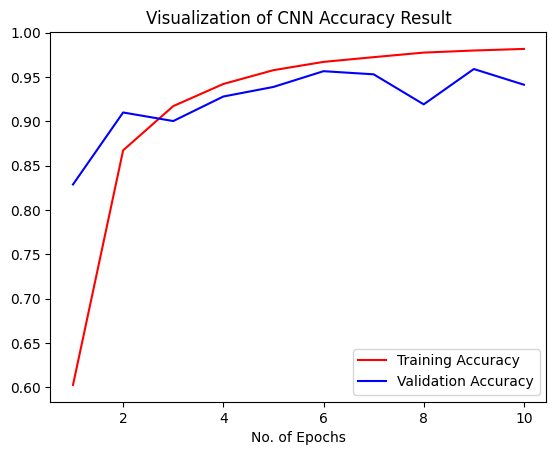

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of CNN Accuracy Result')
plt.legend()
plt.show()

In [38]:
class_name = validation_set.class_names

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step


In [41]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [42]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [43]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [45]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.85      0.92       440
                                   Apple___healthy       0.93      0.92      0.93       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.89      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

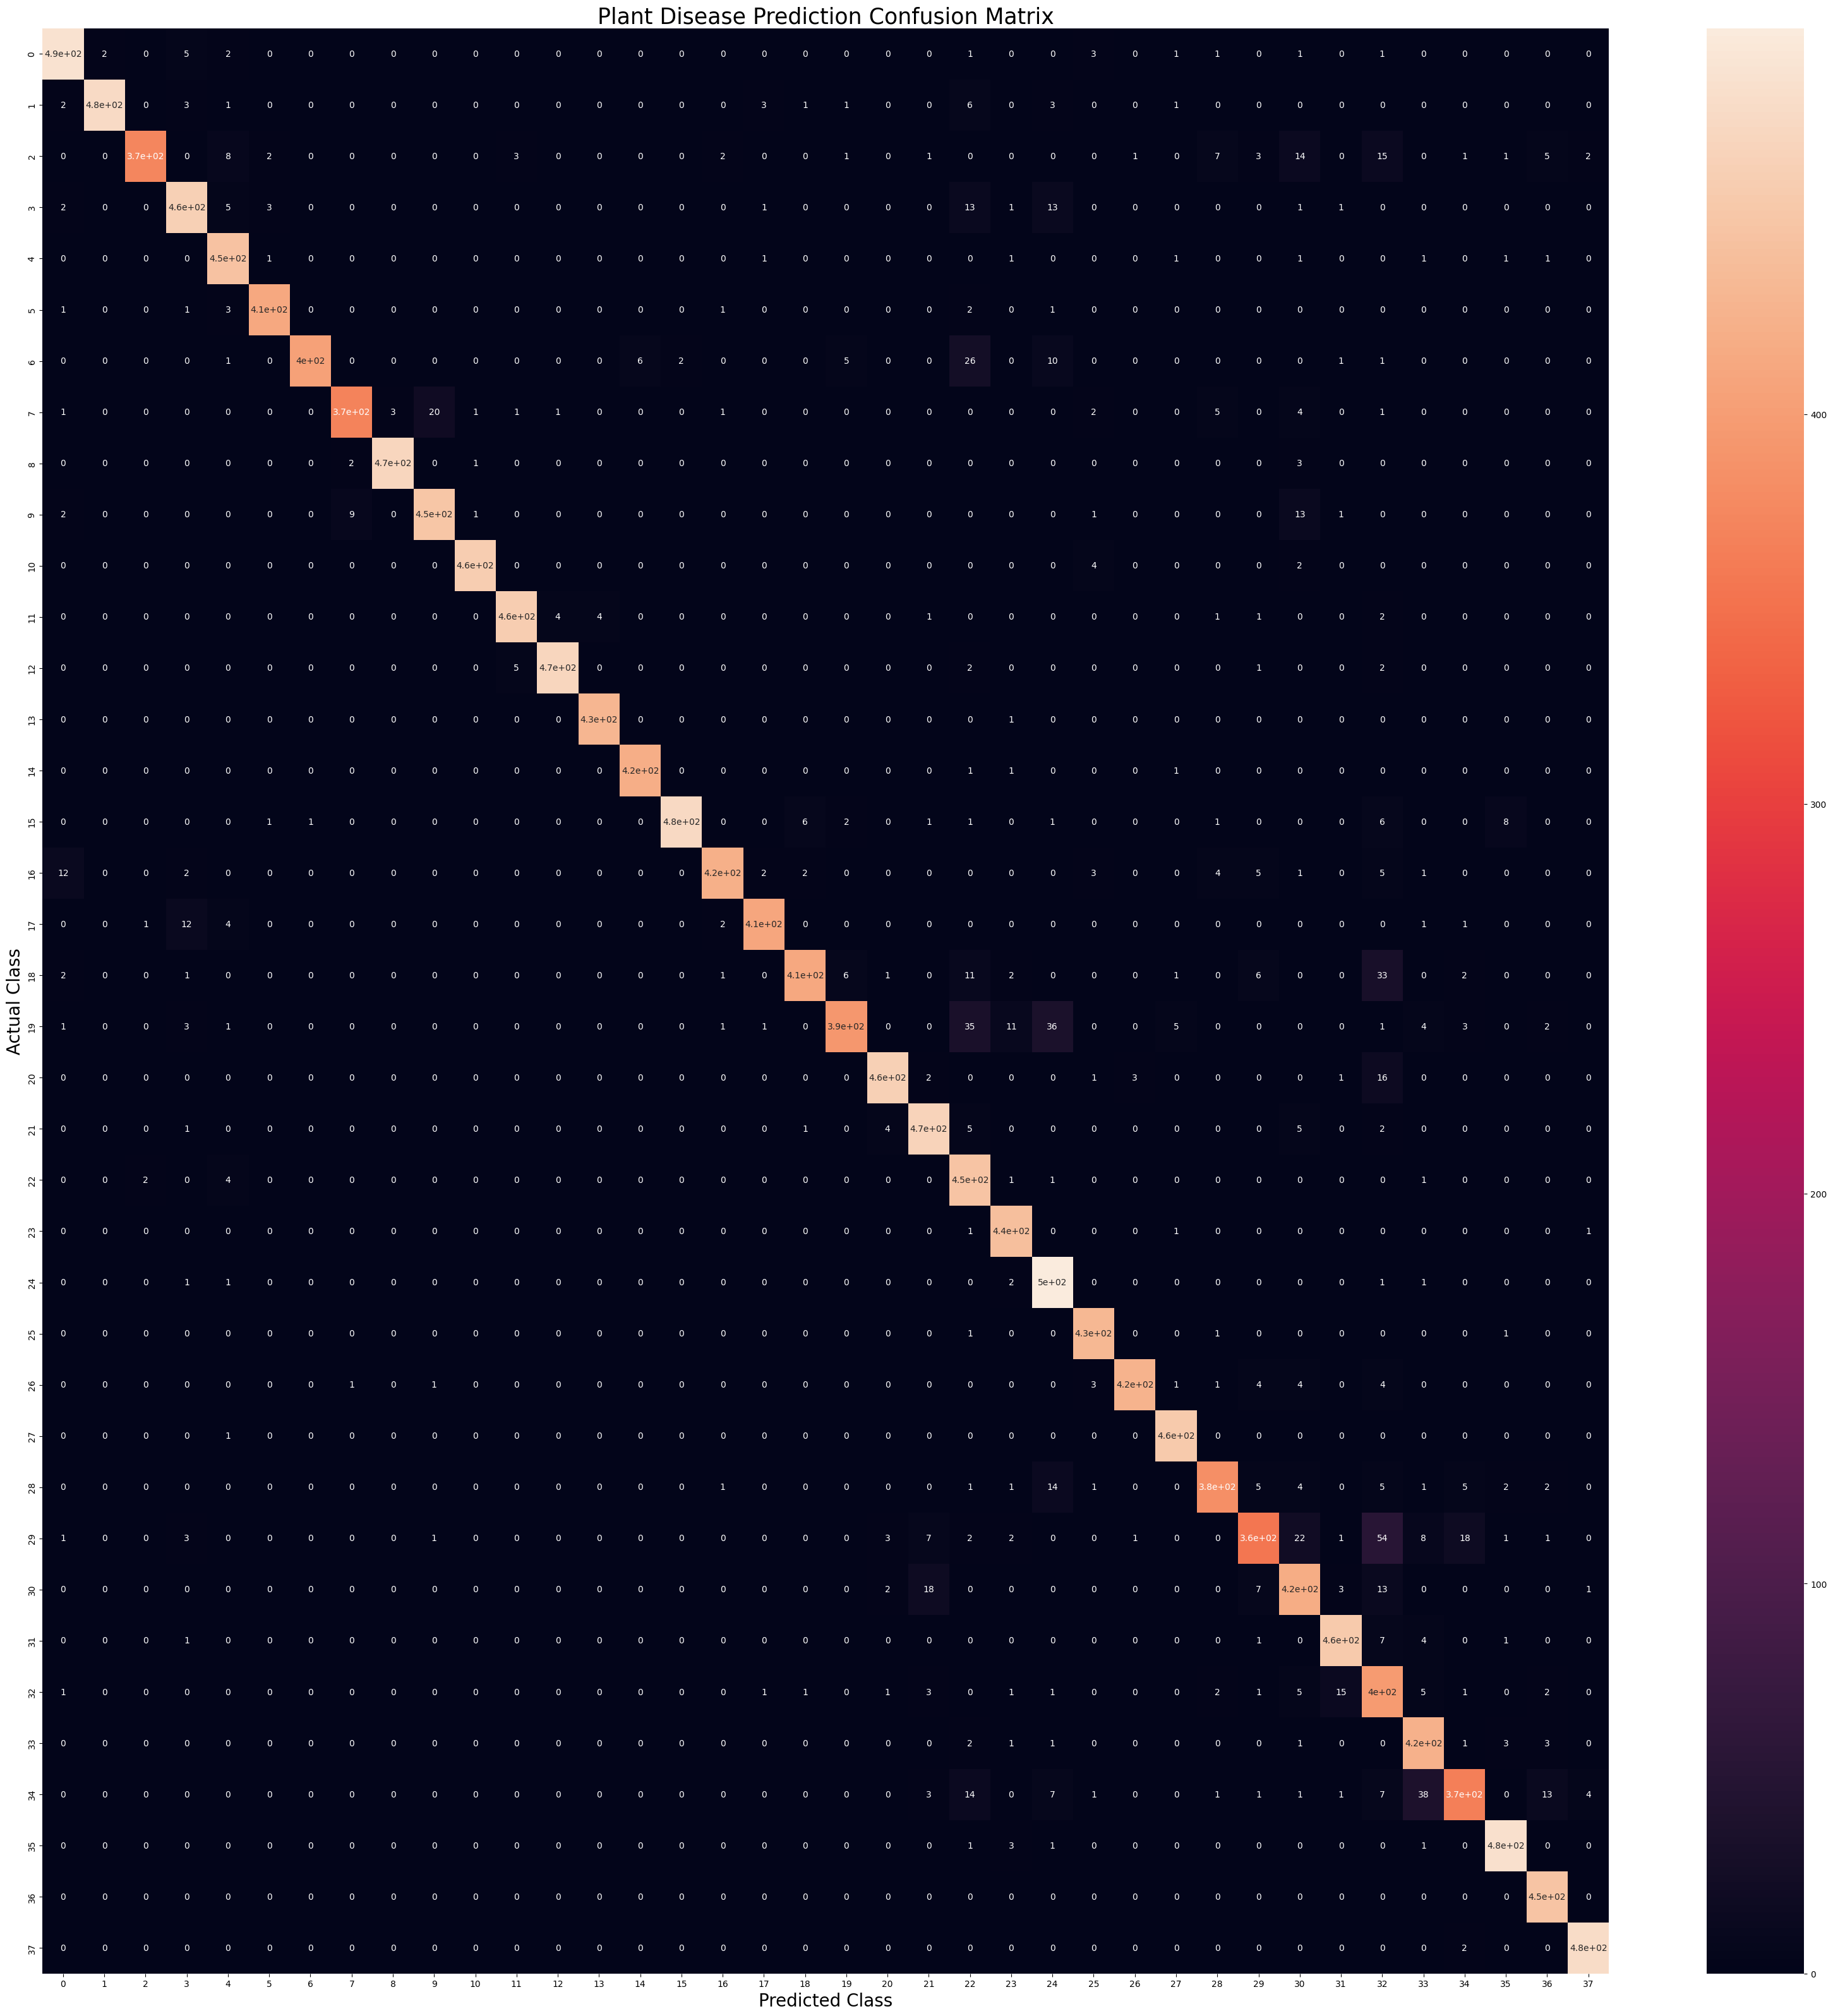

In [46]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [53]:
##Plotting the curves
# Get true labels and predicted probabilities
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

num_classes = len(class_name)
# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert true labels to one-hot encoding for multiclass ROC
Y_true_one_hot = label_binarize(Y_true, classes=range(num_classes))

# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve for each class
# precision = dict()
# recall = dict()
# prc_auc = dict()
# for i in range(num_classes):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_one_hot[:, i], y_pred[:, i])
#     prc_auc[i] = auc(recall[i], precision[i])

# # Plot Precision-Recall curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Multiclass Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, predicted_categories, target_names=class_name))


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.85      0.92       440
                                   Apple___healthy       0.93      0.92      0.93       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.89      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Nor

In [52]:
# # ROC Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Multiclass ROC Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()

# # Precision-Recall Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")

# plt.xlabel('Recall', fontsize=14)
# plt.ylabel('Precision', fontsize=14)
# plt.title('Multiclass Precision-Recall Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()


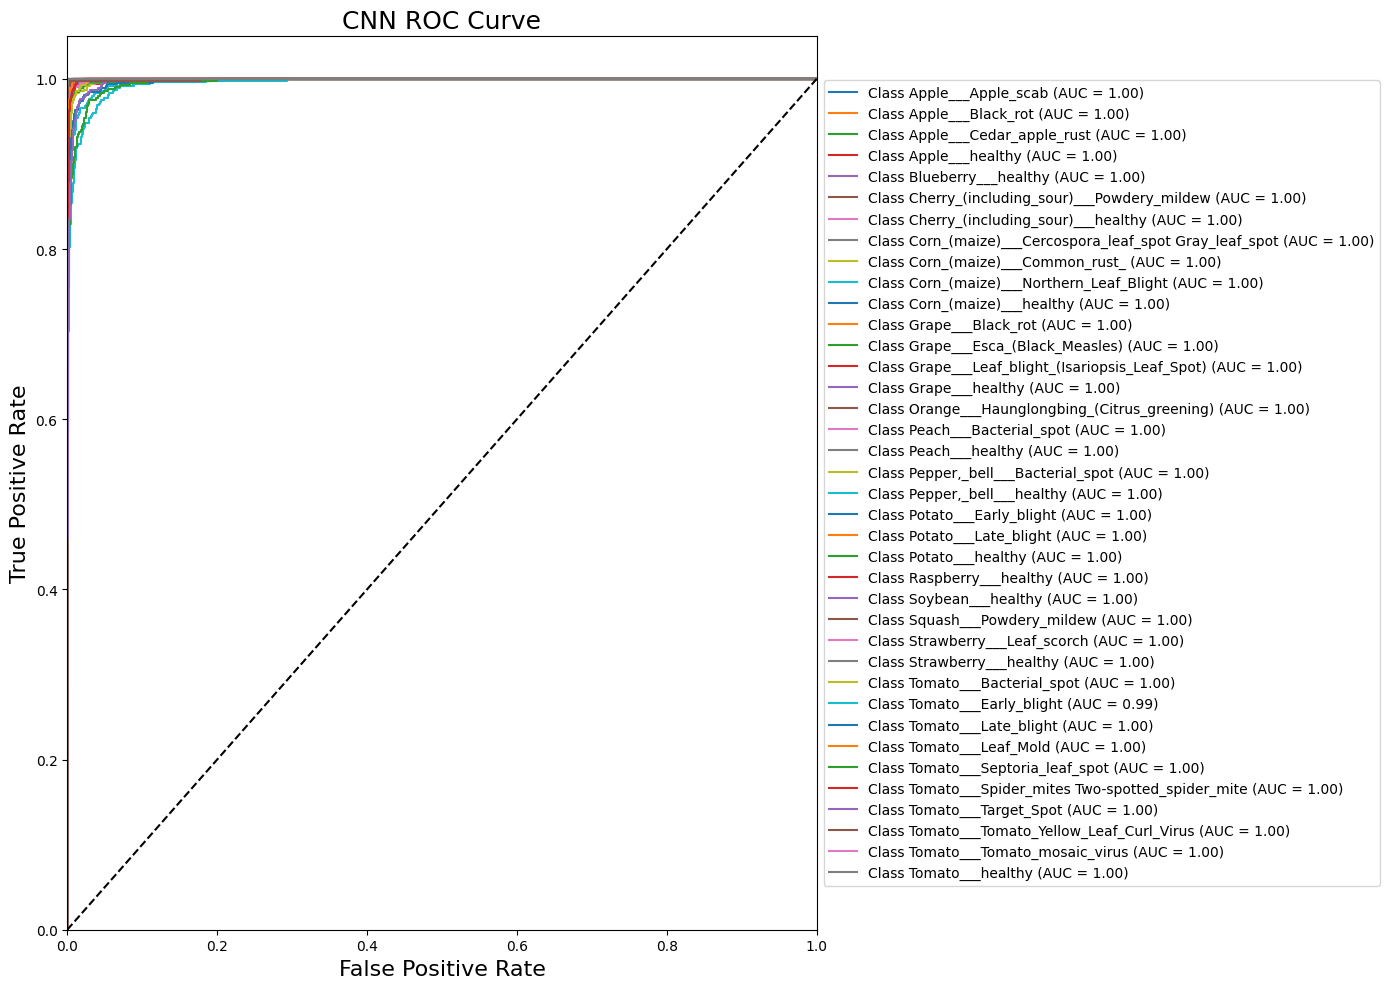

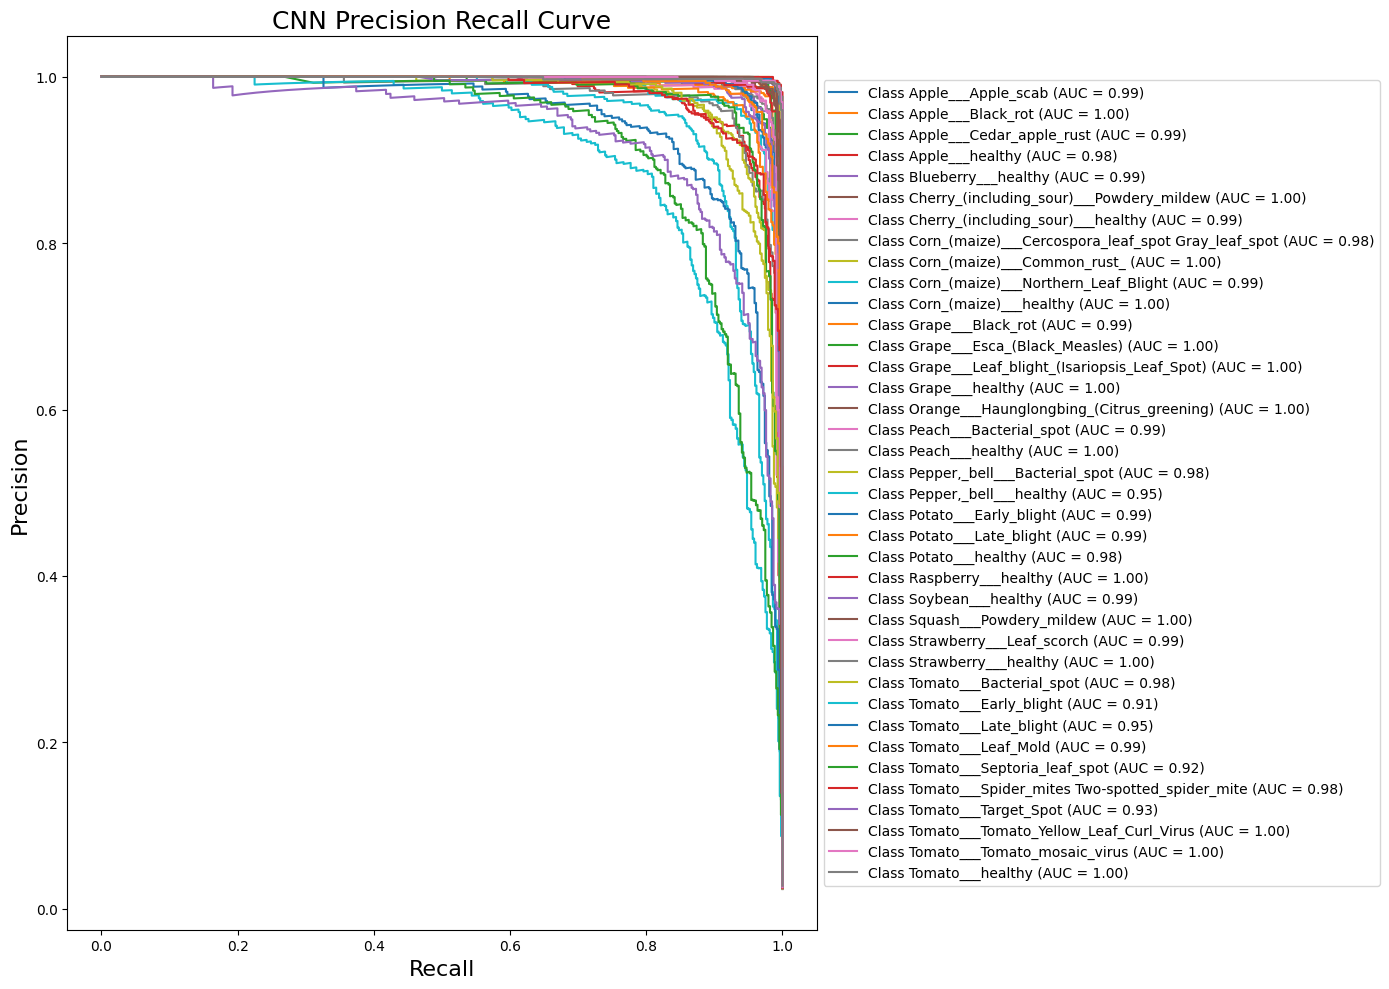

In [51]:
# ROC Curve for each class with smaller legend text and larger plot
plt.figure(figsize=(14, 10))  # Increase figure size for more space

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('CNN ROC Curve', fontsize=18)

# Adjust legend to prevent overlap, with smaller text
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Smaller legend text
plt.tight_layout()  # Adjusts the plot to fit within the figure size
plt.show()

# Precision-Recall Curve for each class with smaller legend text and larger plot
plt.figure(figsize=(14, 10))  # Increase figure size for more space

for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('CNN Precision Recall Curve', fontsize=18)

# Adjust legend to prevent overlap, with smaller text
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Smaller legend text
plt.tight_layout()  # Adjusts the plot to fit within the figure size
plt.show()


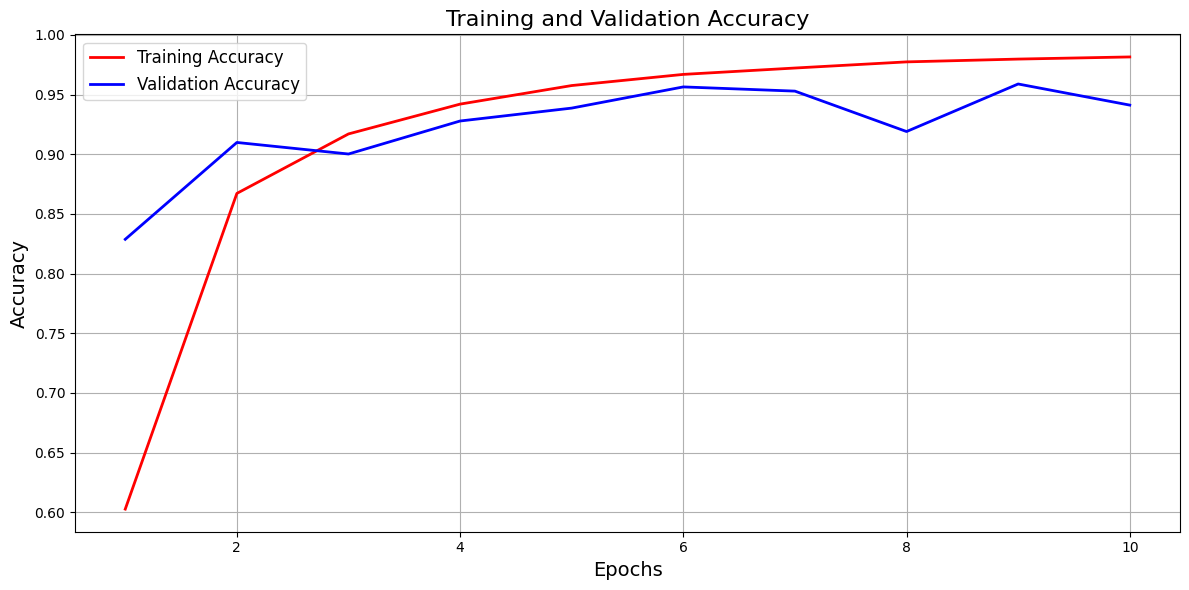

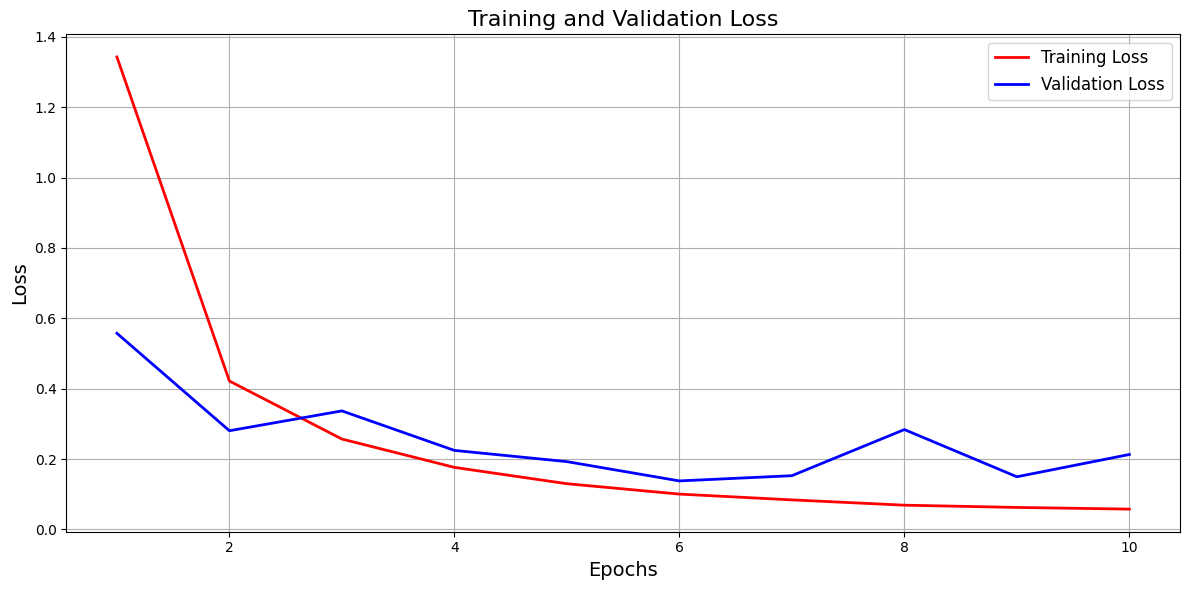

In [55]:
# Assuming training_history contains 'accuracy', 'val_accuracy', 'loss', and 'val_loss'
epochs = range(1, len(training_history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['accuracy'], 'r', label='Training Accuracy', linewidth=2)
plt.plot(epochs, training_history.history['val_accuracy'], 'b', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['loss'], 'r', label='Training Loss', linewidth=2)
plt.plot(epochs, training_history.history['val_loss'], 'b', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
